In [1]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

batch_size = 64
num_classes = 10
epochs = 50

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

from keras.models import Sequential
from keras.layers import Activation, Dense
model = Sequential()

# Keras model with two hidden layer with 10 neurons each 
model.add(Dense(150, input_shape = (784,)))    # Input layer => input_shape should be explicitly designate                      # Hidden layer => only output dimension should be designated
model.add(Activation('sigmoid'))
model.add(Dense(120))                         # Hidden layer => only output dimension should be designated
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))                          # Output layer => output dimension = 1 since it is regression problem

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 150)               117750    
_________________________________________________________________
activation_1 (Activation)    (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 120)               18120     
_________________________________________________________________
activation_2 (Activation)    (None, 120)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1210      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params:

In [2]:
print("Accuracy: %.2f%%" % (score[1]*100))

Accuracy: 97.70%


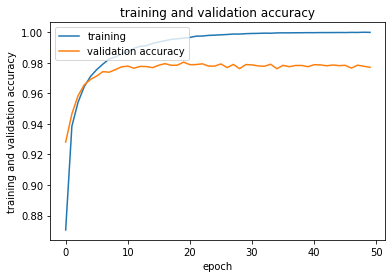

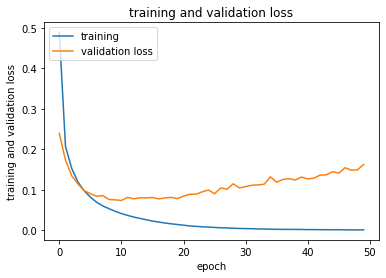

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot

fig = plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation accuracy'], loc = 'upper left')
plt.title('training and validation accuracy')
plt.ylabel('training and validation accuracy')
plt.xlabel('epoch')
plt.show()
fig.savefig('train_val_acc_01_01.png')


fig = plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation loss'], loc = 'upper left')
plt.title('training and validation loss')
plt.ylabel('training and validation loss')
plt.xlabel('epoch')
plt.show()
fig.savefig('train_val_loss_01_01.png')



In [7]:
import time
start_time = time.time()
print("--- %s microseconds ---" % (time.time() - start_time))
print("--- %s seconds ---" % (time.time() - start_time))
print("--- %s milliseconds ---" % (time.time() - start_time))

--- 6.699562072753906e-05 microseconds ---
--- 0.0019328594207763672 seconds ---
--- 0.0022962093353271484 milliseconds ---
